In [233]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [234]:
df_1 = pd.read_csv('../data/raw/csv/categorized_grievances_dataset.csv')
tweets_df = pd.read_csv('../data/raw/csv/Grievance_Tweets_India_RailMin_IncomeTax_DelhiPolice.csv')

## Inspecting and Preparing the categorized_grievances_dataset.csv

In [235]:
df_1.shape, tweets_df.shape

((5000, 2), (3700, 3))

In [236]:
df_1.sample(10)

,Description,Category
3104,Unauthorized money lenders are harassing local...,CM Office (Miscellaneous)
4877,Air pollution levels are extremely high due to...,CM Office (Miscellaneous)
3997,"Garbage is not being collected regularly, lead...",Municipal
193,"The drainage system is inadequate, causing wat...",Municipal
2028,Theft incidents have increased in residential ...,Police
4722,"Violence in certain areas has escalated, with ...",Police
456,"Increased risk of theft and accidents at night.""",Police
1140,Illegal encroachments are obstructing public s...,Development Authority
2705,Reports of rape and sexual violence have shake...,Police
811,The local hospital lacks adequate medical faci...,CM Office (Miscellaneous)


In [237]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Description  5000 non-null   object
 1   Category     5000 non-null   object
dtypes: object(2)
memory usage: 78.2+ KB


In [238]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3700 entries, 0 to 3699
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   tweet_id      3700 non-null   int64 
 1   tweet_text    3664 non-null   object
 2   organization  3700 non-null   object
dtypes: int64(1), object(2)
memory usage: 86.8+ KB


<Axes: ylabel='Category'>

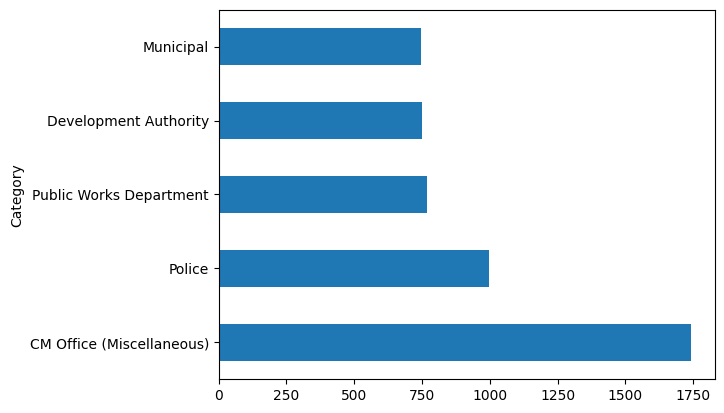

In [239]:
df_1.Category.value_counts().plot(kind='barh')

Fully duplicated rows: 5000


C:\Users\regmi\AppData\Local\Temp\ipykernel_1868\1542599301.py:14: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


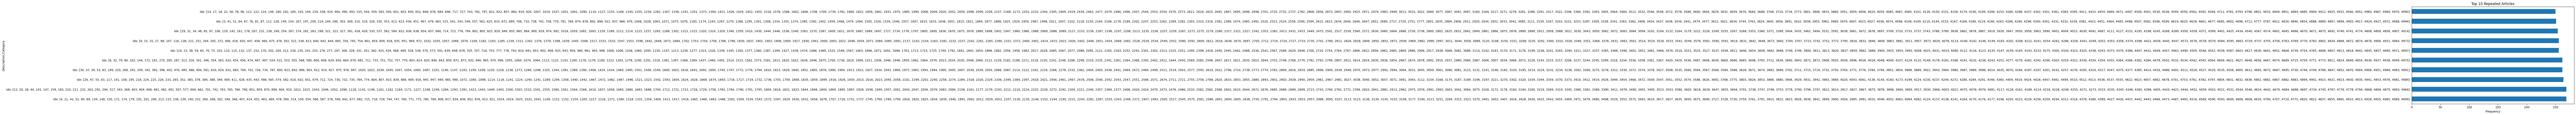

In [240]:
# Detect fully duplicated rows
full_duplicates = df_1[df_1.duplicated(keep=False)]

print(f"Fully duplicated rows: {full_duplicates.shape[0]}")

# Visualize top repeated articles with their indices
top_duplicates = full_duplicates.value_counts().head(10)
top_indices = [full_duplicates[(full_duplicates == row).all(axis=1)].index.tolist() for row in top_duplicates.index]
labels = [f"Idx: {inds}" for inds in top_indices]

top_duplicates.plot(kind='barh', figsize=(10,6), title='Top 10 Repeated Articles')
plt.xlabel("Frequency")
plt.yticks(ticks=range(len(labels)), labels=labels)
plt.tight_layout()
plt.show()

In [241]:
top_duplicates

Description                                                                                         Category                 
Roads in the area are severely damaged, causing frequent accidents and inconvenience to commuters.  Public Works Department      269
Public transport services are irregular, causing difficulties for daily commuters.                  CM Office (Miscellaneous)    269
Schools in the district are facing a shortage of teachers, affecting the quality of education.      CM Office (Miscellaneous)    264
Illegal encroachments are obstructing public spaces and roads, creating traffic congestion.         Development Authority        262
Increased risk of theft and accidents at night."                                                    Police                       262
Theft incidents have increased in residential areas, and police patrolling is inadequate.           Police                       256
Reports of rape and sexual violence have shaken the community, demanding imm

## Dropping the duplicated row from the database

In [242]:
df_1.shape

(5000, 2)

In [243]:
new_df_1= df_1.drop_duplicates().copy()

new_df_1 = new_df_1.reset_index()

new_df_1.drop('index', inplace=True, axis= 1)

In [244]:
new_df_1.info(), new_df_1.index

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Description  20 non-null     object
 1   Category     20 non-null     object
dtypes: object(2)
memory usage: 448.0+ bytes


(None, RangeIndex(start=0, stop=20, step=1))

In [245]:
new_df_1.index

RangeIndex(start=0, stop=20, step=1)

In [246]:
new_df_1

,Description,Category
0,"Violence in certain areas has escalated, with ...",Police
1,"Garbage is not being collected regularly, lead...",Municipal
2,Road accidents have increased due to lack of p...,Public Works Department
3,"Roads in the area are severely damaged, causin...",Public Works Department
4,"Issues related to the Waqf Board have emerged,...",Development Authority
5,"Increased risk of theft and accidents at night.""",Police
6,Air pollution levels are extremely high due to...,CM Office (Miscellaneous)
7,"Land mafia activities have been observed, invo...",Development Authority
8,Reports of rape and sexual violence have shake...,Police
9,"Water supply is inconsistent, and the water qu...",Municipal


In [247]:
new_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Description  20 non-null     object
 1   Category     20 non-null     object
dtypes: object(2)
memory usage: 448.0+ bytes


In [248]:
new_df_1

,Description,Category
0,"Violence in certain areas has escalated, with ...",Police
1,"Garbage is not being collected regularly, lead...",Municipal
2,Road accidents have increased due to lack of p...,Public Works Department
3,"Roads in the area are severely damaged, causin...",Public Works Department
4,"Issues related to the Waqf Board have emerged,...",Development Authority
5,"Increased risk of theft and accidents at night.""",Police
6,Air pollution levels are extremely high due to...,CM Office (Miscellaneous)
7,"Land mafia activities have been observed, invo...",Development Authority
8,Reports of rape and sexual violence have shake...,Police
9,"Water supply is inconsistent, and the water qu...",Municipal


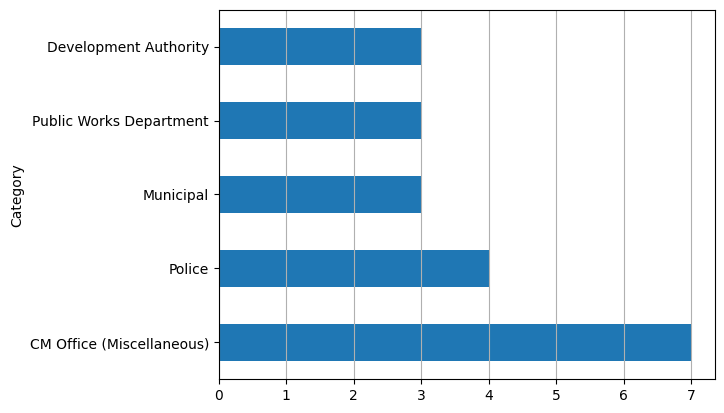

In [249]:
new_df_1.Category.value_counts().plot(kind='barh', grid=True, xerr=None)
plt.grid(axis='y', which='both') 
plt.show()

> Well only 20 rows were unique for the citizen_grievance.csv

In [250]:
new_df_1[new_df_1['Category'] =='CM Office (Miscellaneous)' ]

,Description,Category
6,Air pollution levels are extremely high due to...,CM Office (Miscellaneous)
10,"Public transport services are irregular, causi...",CM Office (Miscellaneous)
14,"Cyber frauds are on the rise, with victims los...",CM Office (Miscellaneous)
15,Schools in the district are facing a shortage ...,CM Office (Miscellaneous)
16,Unauthorized money lenders are harassing local...,CM Office (Miscellaneous)
18,Frequent chain snatching incidents in the area...,CM Office (Miscellaneous)
19,The local hospital lacks adequate medical faci...,CM Office (Miscellaneous)


In [251]:
new_df_1[new_df_1['Category'] =='Municipal' ]


,Description,Category
1,"Garbage is not being collected regularly, lead...",Municipal
9,"Water supply is inconsistent, and the water qu...",Municipal
12,"The drainage system is inadequate, causing wat...",Municipal


In [252]:
new_df_1[new_df_1['Category'] =='Public Works Department' ]


,Description,Category
2,Road accidents have increased due to lack of p...,Public Works Department
3,"Roads in the area are severely damaged, causin...",Public Works Department
11,"Cases of road rage have been reported, highlig...",Public Works Department


In [253]:
new_df_1[new_df_1['Category'] =='Development Authority' ]


,Description,Category
4,"Issues related to the Waqf Board have emerged,...",Development Authority
7,"Land mafia activities have been observed, invo...",Development Authority
17,Illegal encroachments are obstructing public s...,Development Authority


In [254]:
new_df_1[new_df_1['Category'] =='Police' ]


,Description,Category
0,"Violence in certain areas has escalated, with ...",Police
5,"Increased risk of theft and accidents at night.""",Police
8,Reports of rape and sexual violence have shake...,Police
13,Theft incidents have increased in residential ...,Police


In [255]:
df_1.Category.value_counts()

Category
CM Office (Miscellaneous)    1742
Police                        997
Public Works Department       767
Development Authority         749
Municipal                     745
Name: count, dtype: int64

In [256]:
df_1[df_1['Category']=='CM Office (Miscellaneous)']

,Description,Category
7,Air pollution levels are extremely high due to...,CM Office (Miscellaneous)
12,"Public transport services are irregular, causi...",CM Office (Miscellaneous)
20,"Public transport services are irregular, causi...",CM Office (Miscellaneous)
24,"Cyber frauds are on the rise, with victims los...",CM Office (Miscellaneous)
26,Schools in the district are facing a shortage ...,CM Office (Miscellaneous)
...,...,...
4978,Frequent chain snatching incidents in the area...,CM Office (Miscellaneous)
4980,Air pollution levels are extremely high due to...,CM Office (Miscellaneous)
4981,Schools in the district are facing a shortage ...,CM Office (Miscellaneous)
4984,Schools in the district are facing a shortage ...,CM Office (Miscellaneous)


## Manual Mapping of each row to it's respective department and Urgency Mapping too.

In [257]:
# Row 0
new_df_1.loc[0, "Category"] = "Security & Law Enforcement"
new_df_1.loc[0, "Urgency"] = "High"

# Row 1
new_df_1.loc[1, "Category"] = "Infrastructure, Utilities & Natural Resources"
new_df_1.loc[1, "Urgency"] = "Medium"

# Row 2
new_df_1.loc[2, "Category"] = "Security & Law Enforcement"
new_df_1.loc[2, "Urgency"] = "High"

# Row 3
new_df_1.loc[3, "Category"] = "Security & Law Enforcement"
new_df_1.loc[3, "Urgency"] = "High"

# Row 4
new_df_1.loc[4, "Category"] = "Infrastructure, Utilities & Natural Resources"
new_df_1.loc[4, "Urgency"] = "Medium"

# Row 5
new_df_1.loc[5, "Category"] = "Security & Law Enforcement"
new_df_1.loc[5, "Urgency"] = "High"

# Row 6
new_df_1.loc[6, "Category"] = "Infrastructure, Utilities & Natural Resources"
new_df_1.loc[6, "Urgency"] = "High"

# Row 7
new_df_1.loc[7, "Category"] = "Security & Law Enforcement"
new_df_1.loc[7, "Urgency"] = "High"

# Row 8
new_df_1.loc[8, "Category"] = "Security & Law Enforcement"
new_df_1.loc[8, "Urgency"] = "High"

# Row 9
new_df_1.loc[9, "Category"] = "Infrastructure, Utilities & Natural Resources"
new_df_1.loc[9, "Urgency"] = "High"

# Row 10
new_df_1.loc[10, "Category"] = "Infrastructure, Utilities & Natural Resources"
new_df_1.loc[10, "Urgency"] = "Medium"

# Row 11
new_df_1.loc[11, "Category"] = "Security & Law Enforcement"
new_df_1.loc[11, "Urgency"] = "Medium"

# Row 12
new_df_1.loc[12, "Category"] = "Infrastructure, Utilities & Natural Resources"
new_df_1.loc[12, "Urgency"] = "Medium"

# Row 13
new_df_1.loc[13, "Category"] = "Security & Law Enforcement"
new_df_1.loc[13, "Urgency"] = "High"

# Row 14
new_df_1.loc[14, "Category"] = "Security & Law Enforcement"
new_df_1.loc[14, "Urgency"] = "Medium"

# Row 15
new_df_1.loc[15, "Category"] = "Education, Health & Social Welfare"
new_df_1.loc[15, "Urgency"] = "Medium"

# Row 16
new_df_1.loc[16, "Category"] = "Security & Law Enforcement"
new_df_1.loc[16, "Urgency"] = "High"

# Row 17
new_df_1.loc[17, "Category"] = "Infrastructure, Utilities & Natural Resources"
new_df_1.loc[17, "Urgency"] = "Medium"

# Row 18
new_df_1.loc[18, "Category"] = "Security & Law Enforcement"
new_df_1.loc[18, "Urgency"] = "High"

# Row 19
new_df_1.loc[19, "Category"] = "Education, Health & Social Welfare"
new_df_1.loc[19, "Urgency"] = "High"

urgency_map = {
    'High': 'HIGHLY URGENT',
    'Medium': 'URGENT',
    'Low': 'NORMAL'
}
new_df_1['Urgency'] = new_df_1['Urgency'].map(urgency_map)


In [258]:
new_df_1

,Description,Category,Urgency
0,"Violence in certain areas has escalated, with ...",Security & Law Enforcement,HIGHLY URGENT
1,"Garbage is not being collected regularly, lead...","Infrastructure, Utilities & Natural Resources",URGENT
2,Road accidents have increased due to lack of p...,Security & Law Enforcement,HIGHLY URGENT
3,"Roads in the area are severely damaged, causin...",Security & Law Enforcement,HIGHLY URGENT
4,"Issues related to the Waqf Board have emerged,...","Infrastructure, Utilities & Natural Resources",URGENT
5,"Increased risk of theft and accidents at night.""",Security & Law Enforcement,HIGHLY URGENT
6,Air pollution levels are extremely high due to...,"Infrastructure, Utilities & Natural Resources",HIGHLY URGENT
7,"Land mafia activities have been observed, invo...",Security & Law Enforcement,HIGHLY URGENT
8,Reports of rape and sexual violence have shake...,Security & Law Enforcement,HIGHLY URGENT
9,"Water supply is inconsistent, and the water qu...","Infrastructure, Utilities & Natural Resources",HIGHLY URGENT


In [259]:
print(new_df_1.Category.value_counts())

Category
Security & Law Enforcement                       11
Infrastructure, Utilities & Natural Resources     7
Education, Health & Social Welfare                2
Name: count, dtype: int64


In [260]:
print(new_df_1.Urgency.value_counts())

Urgency
HIGHLY URGENT    12
URGENT            8
Name: count, dtype: int64


## indian tweets grievance dataset

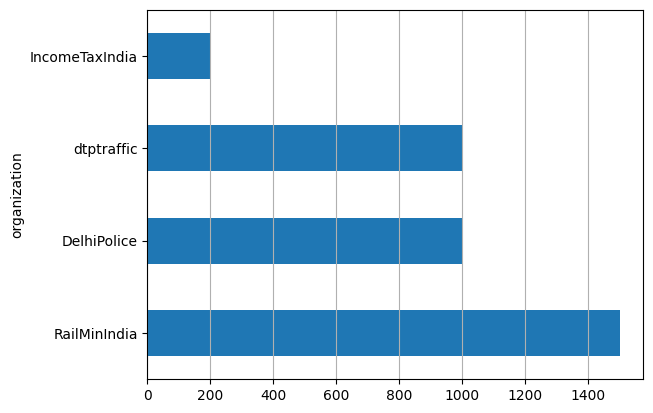

In [261]:
tweets_df.organization.value_counts().plot(kind='barh')
plt.grid(axis='x', which='both') 
plt.show()

> Dropping the organization: RailMiniIndia as it is not necessary incontext of nepal

In [262]:
new_tweets_df = tweets_df[tweets_df['organization'] != 'RailMinIndia'].copy()


In [263]:
new_tweets_df.organization.unique()

array(['DelhiPolice', 'dtptraffic', 'IncomeTaxIndia'], dtype=object)

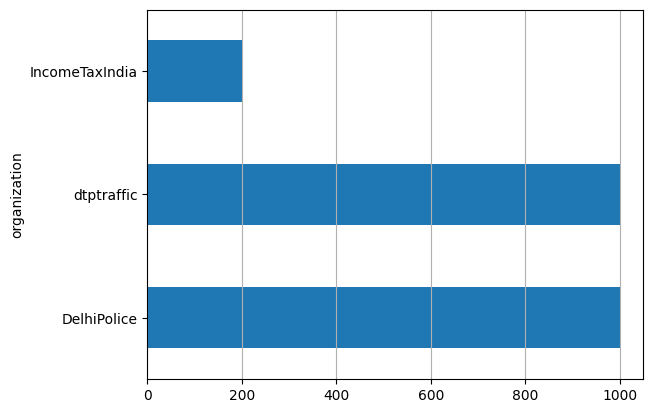

In [264]:
new_tweets_df.organization.value_counts().plot(kind='barh')
plt.grid(axis='x', which='both') 
plt.show()

In [265]:
new_tweets_df.organization= new_tweets_df.organization.replace({'IncomeTaxIndia': 'IncomeTax', 'DelhiPolice': 'Nepal Police', 'dtptraffic':'Traffice Police'})

In [266]:
new_tweets_df.organization.unique()

array(['Nepal Police', 'Traffice Police', 'IncomeTax'], dtype=object)

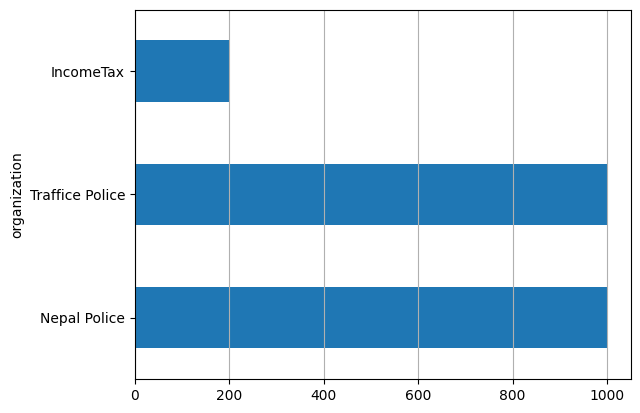

In [267]:
new_tweets_df.organization.value_counts().plot(kind='barh')
plt.grid(axis='x', which='both') 
plt.show()

In [268]:
# removing the indian stop word and phrases from the tweets
new_tweets_df[new_tweets_df['organization']=='IncomeTax']

,tweet_id,tweet_text,organization
49,719434604130619392,A laudable effort by in launching an e-appeal ...,IncomeTax
69,719467203121123328,PAN migration request of large no. Of tax paye...,IncomeTax
84,719522572514164736,I called called assessing officer about my my ...,IncomeTax
104,719609770395586560,Frauds of sarda-narda chit-fund scam must get ...,IncomeTax
105,719610498342199297,Assets belongings and properties of all govern...,IncomeTax
...,...,...,...
3553,728923465504411648,Please investigate and interrogate him.,IncomeTax
3614,729184914663313412,Monarch Universal Builders cheated us by usurp...,IncomeTax
3645,729263042312052736,Party having annual income 50k claiming 50L ex...,IncomeTax
3663,729302407319015424,The builder is asking me different ways to pay...,IncomeTax


In [269]:
new_tweets_df['char_count'] = new_tweets_df['tweet_text'].str.len()

In [270]:
import pandas as pd
import re

# Copy dataset
df = new_tweets_df.copy()

# Keywords/phrases to DROP (all lowercase)
drop_keywords = [
    "pan", "aadhar", "gst", "delhi", "mumbai", "burari",
    "india", "indians", "usa and india", "offence"
]

# License plate regex (generic: 2 letters + numbers + letters + 4 digits)
license_plate_pattern = r"\b[a-z]{2}\s?[0-9]{1,2}\s?[a-z]{1,2}\s?[0-9]{4}\b"

# Function to clean & filter tweets
def clean_tweet(text):
    text = str(text).lower()
    # remove urls, mentions, hashtags
    text = re.sub(r"http\S+|www\S+|@\S+|#\S+", "", text)

    # drop if contains any keyword
    if any(kw in text for kw in drop_keywords):
        return ""

    # drop if matches license plate pattern
    if re.search(license_plate_pattern, text):
        return ""

    return text.strip()

# Apply cleaning
df["cleaned_tweet"] = df["tweet_text"].apply(clean_tweet)

# Drop tweets that became empty after cleaning
df = df[df["cleaned_tweet"].str.strip() != ""]

# Map Indian handles → Nepali counterparts (all lowercase)
mapping = {
    "incometaxindia": "irdnepal",
    "delhipolice": "nepalpolice",
    "dtptraffic": "trafficpolicenepal"
}
df["organization"] = df["organization"].str.lower().replace(mapping)

# Drop rows with ANY NaN in any column
df = df.dropna(how="any")

# Reset index
df = df.reset_index(drop=True)

df = df[df['organization'] != 'railminindia'].copy()


# dropping very small tweets as they are irrevelant
df = df[df['char_count'] > 50]

# dropping the two unecessary columns
df.drop(index=[5, 10], inplace=True) # this row contain some noise information
df.drop('tweet_text', axis=1, inplace=True)


print("Remaining rows:", len(df))



Remaining rows: 1404


In [271]:
df

,tweet_id,organization,char_count,cleaned_tweet
0,719331238868180992,nepal police,115.0,1 strong punishment can prevent a lot of crime...
1,719332879075946496,nepal police,110.0,my personal view- father should go to jail too...
2,719338371823321088,nepal police,108.0,dear arrest this useless lady she spreading ha...
3,719338460767608833,traffice police,138.0,the minor was challand thrice last year. but w...
4,719346355366273025,traffice police,117.0,reckless driving by underage kids at roop naga...
...,...,...,...,...
1667,729377749446451200,nepal police,107.0,"dominos called me 15 times from 5 different ""n..."
1668,729378511849316353,nepal police,79.0,retweeted shanta kumar ( y so much delay by ou...
1670,729426642758598656,traffice police,67.0,rape/molestation bound to happen if does not d...
1671,729433095074500608,nepal police,123.0,is this d reason complaining to police and tho...


<Axes: ylabel='Frequency'>

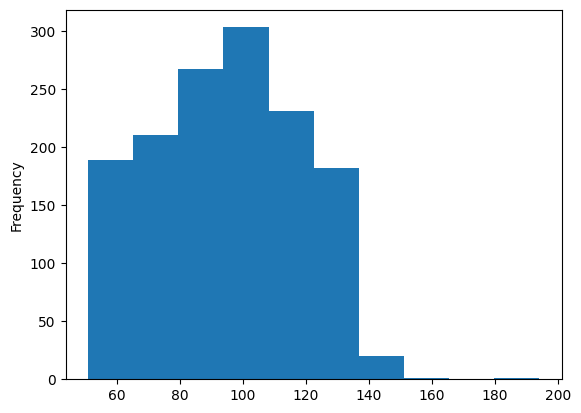

In [272]:
df['char_count'].plot(kind='hist')

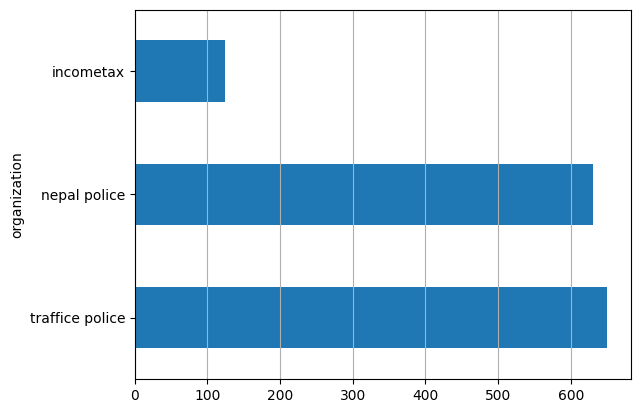

In [273]:
df.organization.value_counts().plot(kind='barh')
plt.grid(axis='x', which='both') 
plt.show()

### Routing the subdepartments-to-super-departments

In [274]:
# Routing dictionary based on super-department table
department_routing = {
    'nepal police': 'Security & Law Enforcement',
    'traffice police': 'Security & Law Enforcement',
    'incometax': 'Municipal Governance & Community Services'
}

df['super_depart'] = df['organization'].map(department_routing)

In [275]:
df.rename(columns={'tweet_id': 'id', 'cleaned_tweet': 'grievance'}, inplace=True)

In [276]:
df.drop('char_count', inplace=True, axis=1)
df.head()

,id,organization,grievance,super_depart
0,719331238868180992,nepal police,1 strong punishment can prevent a lot of crime...,Security & Law Enforcement
1,719332879075946496,nepal police,my personal view- father should go to jail too...,Security & Law Enforcement
2,719338371823321088,nepal police,dear arrest this useless lady she spreading ha...,Security & Law Enforcement
3,719338460767608833,traffice police,the minor was challand thrice last year. but w...,Security & Law Enforcement
4,719346355366273025,traffice police,reckless driving by underage kids at roop naga...,Security & Law Enforcement


### saving the dataset

In [277]:
df.to_csv('../data/processed/cleaned_grievance_tweets.csv', index=False)

# Inspecting the sambodhan_grievance.csv

In [278]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [279]:
hello_sarkar_df = pd.read_csv('../data/raw/csv/sambodhan_complaint_details.csv')
hello_sarkar_grievance_info_df = pd.read_csv('../data/raw/csv/sambodhan_grievances.csv')

In [280]:
hello_sarkar_grievance_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 278 non-null    int64 
 1   form_name          278 non-null    object
 2   form_name_np       278 non-null    object
 3   created_at         278 non-null    object
 4   created_at_en      278 non-null    object
 5   created_at_nepali  278 non-null    object
 6   public             278 non-null    int64 
 7   time               278 non-null    object
dtypes: int64(2), object(6)
memory usage: 17.5+ KB


In [281]:
hello_sarkar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                277 non-null    int64  
 1   statusColor                       277 non-null    object 
 2   statusIcon                        277 non-null    object 
 3   assigned_office_id                251 non-null    float64
 4   assigned_office_name              250 non-null    object 
 5   follow_up                         277 non-null    int64  
 6   source                            277 non-null    object 
 7   ticket_number                     277 non-null    object 
 8   assigned_for_information_purpose  277 non-null    int64  
 9   form_name                         277 non-null    object 
 10  created_at_nepali                 277 non-null    object 
 11  created_at                        277 non-null    object 
 12  status  

In [282]:
hello_sarkar_df[hello_sarkar_df.assigned_office_name.isna()]

,id,statusColor,statusIcon,assigned_office_id,assigned_office_name,follow_up,source,ticket_number,assigned_for_information_purpose,form_name,created_at_nepali,created_at,status,complain_type,complain_type_text,complain_type_color,form_details,actions
12,52586,#0F76BC,visibility,788.0,NaN,0,Twitter,HS-16592-52586,0,यातायातका साधनको बिषयमा गरिने गुनासो,"११ पुष २०८०, बुधवार (07:40:42 AM)",2023-12-27 07:40:42,SEEN/PENDING,HIGHLY URGENT,#DC3545,#FAE1E3,{'अन्य विवरण/ जानकारी': 'madhesh pardesh ko sa...,"[{'id': 311999, 'created_at': '2023-12-24 11:1..."
14,52451,#33A34F,done_all,NaN,NaN,0,Nagarik App,HS-WEB-52451,0,सुझाव सम्बन्धी,"१० असोज २०८०, बुधवार (02:24:39 PM)",2023-09-27 14:24:39,CLOSED,NaN,NaN,NaN,{'गुनासो/उजुरीको संक्षिप्त विवरण': 'काठमाडौँ ज...,"[{'id': 282668, 'created_at': '2023-09-27 16:1..."
18,52356,#0F76BC,block,NaN,NaN,0,Twitter,HS-16592-52356,0,कार्यालयको सूचना व्यवस्थापन,"९ असोज २०८०, मङ्गलवार (04:07:57 PM)",2023-09-26 16:07:57,INCOMPLETE/FAKE/UNRELATED,HIGHLY URGENT,#DC3545,#FAE1E3,{'गुनासो/उजुरीको संक्षिप्त विवरण': 'Yi bus ma ...,"[{'id': 438161, 'created_at': '2025-03-11 13:2..."
53,51341,#33A34F,done_all,NaN,NaN,0,Twitter,HS-16592-51341,0,अस्पताल/स्वास्थ्य चौकीमा अनियमितता,"२५ भदौ २०८०, सोमवार (03:49:17 PM)",2023-09-11 15:49:17,CLOSED,HIGHLY URGENT,#DC3545,#FAE1E3,{'गुनासो/उजुरीको संक्षिप्त विवरण': 'M.R.P. Rs....,"[{'id': 292101, 'created_at': '2023-10-25 13:4..."
58,51236,#FAA64B,visibility_off,NaN,NaN,0,Twitter,HS-16592-51236,0,कर्मचारीको अनुसासन/आचरण,"२४ भदौ २०८०, आइतवार (02:56:25 PM)",2023-09-10 14:56:25,RE-ASSIGNED/UNSEEN,HIGHLY URGENT,#DC3545,#FAE1E3,{'गुनासो/उजुरीको संक्षिप्त विवरण': 'यो समाचार ...,"[{'id': 273439, 'created_at': '2023-09-10 14:5..."
64,50913,#0F76BC,block,NaN,NaN,0,Twitter,HS-16592-50913,0,कार्यालयको सूचना व्यवस्थापन,"२१ भदौ २०८०, बिहिवार (02:36:44 PM)",2023-09-07 14:36:44,INCOMPLETE/FAKE/UNRELATED,HIGHLY URGENT,#DC3545,#FAE1E3,{'गुनासो/उजुरीको संक्षिप्त विवरण': 'यो कुन जिल...,"[{'id': 271524, 'created_at': '2023-09-07 14:3..."
99,31693,#0F76BC,block,NaN,NaN,0,Nagarik App,HS-WEB-31693,0,श्रम रोजगार तथा सामाजिक सुरक्षासंग सम्बन्धित ग...,"११ साउन २०७९, बुधवार (08:59:44 PM)",2022-07-27 20:59:44,INCOMPLETE/FAKE/UNRELATED,NaN,NaN,NaN,{'गुनासोको प्रकार': 'मेनपावरले तोके भन्दा बढी...,"[{'id': 158887, 'created_at': '2022-07-28 07:5..."
111,25424,#33A34F,done_all,NaN,NaN,0,Nagarik App,HS-WEB-25424,0,वेबसाइटमा समस्या,"२१ फागुन २०७८, शनिवार (11:32:43 AM)",2022-03-05 11:32:43,CLOSED,NaN,NaN,NaN,"{'गुनासोको प्रकृति': 'अन्य', 'अन्य विवरण/जानक...","[{'id': 131993, 'created_at': '2022-03-05 17:0..."
119,19764,#33A34F,done_all,NaN,NaN,0,Website,HS-WEB-19764,0,सामुदायिक विद्यालय सम्बन्धी गुनासो,"२८ मंसिर २०७८, मङ्गलवार (09:00:20 AM)",2021-12-14 09:00:20,CLOSED,HIGHLY URGENT,#DC3545,#FAE1E3,{'गुनासो/उजुरीको संक्षिप्त विवरण': 'माननीय मन्...,"[{'id': 101858, 'created_at': '2021-09-30 14:3..."
123,17811,#33A34F,done_all,NaN,NaN,0,Website,HS-WEB-17811,0,फुटपाथ/ जेब्राक्रस नभएको,"३१ साउन २०७८, आइतवार (04:14:48 PM)",2021-08-15 16:14:48,CLOSED,URGENT,#FFAE00,#FEF2D9,"{'गुनासो/उजुरीको संक्षिप्त विवरण': ""There are ...","[{'id': 92071, 'created_at': '2021-08-17 11:14..."


In [283]:
hello_sarkar_df.head()

,id,statusColor,statusIcon,assigned_office_id,assigned_office_name,follow_up,source,ticket_number,assigned_for_information_purpose,form_name,created_at_nepali,created_at,status,complain_type,complain_type_text,complain_type_color,form_details,actions
0,83222,#33A34F,done_all,12.0,"संस्कृति, पर्यटन तथा नागरिक उड्डयन मन्त्रालय",0,what's app,HS-WEB-83222,0,पर्यटकसंग सम्बन्धित,"८ जेठ २०८२, बिहिवार (11:29:20 PM)",2025-05-22 23:29:20,CLOSED,HIGHLY URGENT,#DC3545,#FAE1E3,"{'गुनासो/उजुरीको संक्षिप्त विवरण': ""Subject: E...","[{'id': 465167, 'created_at': '2025-05-22 23:2..."
1,83215,#11AEBA,autorenew,4021.0,मुख्यमन्त्री तथा मन्त्रिपरिषद्को कार्यालय मधेश,0,what's app,HS-WEB-83215,0,सुझाव सम्बन्धी,"८ जेठ २०८२, बिहिवार (09:43:23 PM)",2025-05-22 21:43:23,PROCESSING,HIGHLY URGENT,#DC3545,#FAE1E3,{'सम्बन्धित कागजात (छ भने)': 'storage/uploads/...,"[{'id': 465152, 'created_at': '2025-05-22 21:4..."
2,74259,#33A34F,done_all,19.0,स्वास्थ्य तथा जनसंख्या मन्त्रालय,0,National Call,HS-62988-74259,1,स्वास्थ्य चौकी/अस्पतालसंग सम्बन्धी,"१८ पुष २०८१, बिहिवार (12:43:48 PM)",2025-01-02 12:43:48,CLOSED,URGENT,#FFAE00,#FEF2D9,{'गुनासो/उजुरीको संक्षिप्त विवरण': 'स्वास्थ्य ...,"[{'id': 403042, 'created_at': '2024-12-12 21:5..."
3,73063,#11AEBA,autorenew,31.0,अर्थ मन्त्रालय,0,Website,HS-WEB-73063,0,युवा खेलकुद सम्बन्धी,"२ मंसिर २०८१, आइतवार (10:22:38 AM)",2024-11-17 10:22:38,PROCESSING,URGENT,#FFAE00,#FEF2D9,{'गुनासो/उजुरीको संक्षिप्त विवरण': 'युवा तथा स...,"[{'id': 394459, 'created_at': '2024-11-17 10:2..."
4,71078,#11AEBA,autorenew,860.0,नेपाल विद्युत प्राधिकरण,0,National Call,HS-104027-71078,0,विद्युत सम्बन्धि गुनासो,"१० असोज २०८१, बिहिवार (05:03:47 PM)",2024-09-26 17:03:47,PROCESSING,HIGHLY URGENT,#DC3545,#FAE1E3,{'गुनासो/उजुरीको संक्षिप्त विवरण': 'उपरोक्त सम...,"[{'id': 385384, 'created_at': '2024-09-26 17:0..."


In [284]:
hello_sarkar_df.assigned_office_name.value_counts()

assigned_office_name
प्रहरी प्रधान कार्यालय                                          26
सडक विभाग                                                       18
नेपाल विद्युत प्राधिकरण                                         13
काठमाण्डौं महानगरपालिका                                         13
वाणिज्य, आपूर्ति तथा उपभोक्ता हित संरक्षण विभाग                 10
                                                                ..
सार्वजनिक खरिद अनुगमन कार्यालय                                   1
उद्योग पर्यटन वन तथा वातावरण मन्त्रालय (सूदुरपश्‍चिम प्रदेश)     1
सामाजिक विकास मन्त्रालय (कोशी प्रदेश)                            1
सशस्त्र प्रहरी बल, नेपाल                                         1
भूमि व्यवस्था, कृषि तथा सहकारी मन्त्रालय (मधेश प्रदेश)           1
Name: count, Length: 100, dtype: int64

In [285]:
import ast  
print((ast.literal_eval(hello_sarkar_df.form_details[0])['गुनासो/उजुरीको संक्षिप्त विवरण']))

Subject: Enhancing Nepal’s Tourism Policies and Airport Facilities

I hope this message finds you in good health and high spirits. I am writing to bring to your esteemed attention two significant proposals that have the potential to enhance Nepal’s tourism experience, strengthen the bond between Non-Resident Nepalis (NRNs) and their homeland, and improve the comfort of families traveling through Nepal’s airports.
1. Free Visa Provisions for Non-Resident Nepali (NRN) Citizens  As an NRN, I deeply value the cultural and economic connections we maintain with Nepal. NRNs across the globe play an instrumental role in promoting Nepal internationally, fostering investment, and contributing to its economic growth. Introducing a free visa policy for NRN citizens would not only encourage more frequent visits but also reinforce our commitment to supporting Nepal’s prosperity. This initiative would serve as a heartfelt acknowledgment of NRNs' contributions and strengthen their emotional and financ

In [286]:
missing_office_name_grievance_ids=(hello_sarkar_df[hello_sarkar_df.assigned_office_name.isna()]['id'])

In [287]:
hello_sarkar_grievance_info_df[hello_sarkar_grievance_info_df['id'].isin(missing_office_name_grievance_ids)]

,id,form_name,form_name_np,created_at,created_at_en,created_at_nepali,public,time
12,52586,Complaints asked for transportation,यातायातका साधनको बिषयमा गरिने गुनासो,2080-09-11,2023-12-27,"११ पुष २०८०, बुधवार (07:40:42 AM)",1,07:40 AM
14,52451,Related to suggestion,सुझाव सम्बन्धी,2080-06-10,2023-09-27,"१० असोज २०८०, बुधवार (02:24:39 PM)",1,02:24 PM
18,52356,Office Information Management,कार्यालयको सूचना व्यवस्थापन,2080-06-09,2023-09-26,"९ असोज २०८०, मङ्गलवार (04:07:57 PM)",1,04:07 PM
53,51341,Irregularity in hospital/Health post,अस्पताल/स्वास्थ्य चौकीमा अनियमितता,2080-05-25,2023-09-11,"२५ भदौ २०८०, सोमवार (03:49:17 PM)",1,03:49 PM
58,51236,Employee's Discipline /Behaviour,कर्मचारीको अनुसासन/आचरण,2080-05-24,2023-09-10,"२४ भदौ २०८०, आइतवार (02:56:25 PM)",1,02:56 PM
64,50913,Office Information Management,कार्यालयको सूचना व्यवस्थापन,2080-05-21,2023-09-07,"२१ भदौ २०८०, बिहिवार (02:36:44 PM)",1,02:36 PM
99,31693,Complaints related to labor employment,श्रम रोजगार तथा सामाजिक सुरक्षासंग सम्बन्धित ग...,2079-04-11,2022-07-27,"११ साउन २०७९, बुधवार (08:59:44 PM)",1,08:59 PM
111,25424,Problem in Website,वेबसाइटमा समस्या,2078-11-21,2022-03-05,"२१ फागुन २०७८, शनिवार (11:32:43 AM)",1,11:32 AM
119,19764,Complaints Related to Government/community school,सामुदायिक विद्यालय सम्बन्धी गुनासो,2078-08-28,2021-12-14,"२८ मंसिर २०७८, मङ्गलवार (09:00:20 AM)",1,09:00 AM
123,17811,No Footpath/Zebra cross,फुटपाथ/ जेब्राक्रस नभएको,2078-04-31,2021-08-15,"३१ साउन २०७८, आइतवार (04:14:48 PM)",1,04:14 PM


In [288]:
hello_sarkar_df[hello_sarkar_df.assigned_office_name.isna()][['id', 'form_details']]

,id,form_details
12,52586,{'अन्य विवरण/ जानकारी': 'madhesh pardesh ko sa...
14,52451,{'गुनासो/उजुरीको संक्षिप्त विवरण': 'काठमाडौँ ज...
18,52356,{'गुनासो/उजुरीको संक्षिप्त विवरण': 'Yi bus ma ...
53,51341,{'गुनासो/उजुरीको संक्षिप्त विवरण': 'M.R.P. Rs....
58,51236,{'गुनासो/उजुरीको संक्षिप्त विवरण': 'यो समाचार ...
64,50913,{'गुनासो/उजुरीको संक्षिप्त विवरण': 'यो कुन जिल...
99,31693,{'गुनासोको प्रकार': 'मेनपावरले तोके भन्दा बढी...
111,25424,"{'गुनासोको प्रकृति': 'अन्य', 'अन्य विवरण/जानक..."
119,19764,{'गुनासो/उजुरीको संक्षिप्त विवरण': 'माननीय मन्...
123,17811,"{'गुनासो/उजुरीको संक्षिप्त विवरण': ""There are ..."


In [289]:
hello_sarkar_df.columns

Index(['id', 'statusColor', 'statusIcon', 'assigned_office_id',
       'assigned_office_name', 'follow_up', 'source', 'ticket_number',
       'assigned_for_information_purpose', 'form_name', 'created_at_nepali',
       'created_at', 'status', 'complain_type', 'complain_type_text',
       'complain_type_color', 'form_details', 'actions'],
      dtype='object')

In [290]:
new_grievance_df = hello_sarkar_df[['id',  'assigned_office_id',
       'assigned_office_name', 'created_at', 'status', 'complain_type', 'form_details', 'actions']].copy()

In [291]:
import numpy as np
import ast

def extract_grievance(s):
    try:
        d = ast.literal_eval(s)
        if isinstance(d, dict):
            if 'गुनासो/उजुरीको संक्षिप्त विवरण' in d:
                return d['गुनासो/उजुरीको संक्षिप्त विवरण']
            elif 'अन्य विवरण/ जानकारी' in d:
                return d['अन्य विवरण/ जानकारी']
            elif 'अन्य विवरण/जानकारी' in d:
                return d['अन्य विवरण/जानकारी']
            elif '867' in d:
                return d['867']
        return np.nan
    except (ValueError, SyntaxError):
        return np.nan

# Apply to your DataFrame
new_grievance_df['grievance'] = new_grievance_df['form_details'].apply(extract_grievance)


In [292]:
new_grievance_df.drop('form_details', axis=1, inplace=True)


In [293]:
# dropping the missing value from the grievance

new_grievance_df.dropna(subset=['grievance'], inplace=True, axis=0)

new_grievance_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 272 entries, 0 to 276
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    272 non-null    int64  
 1   assigned_office_id    247 non-null    float64
 2   assigned_office_name  246 non-null    object 
 3   created_at            272 non-null    object 
 4   status                272 non-null    object 
 5   complain_type         245 non-null    object 
 6   actions               272 non-null    object 
 7   grievance             272 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 19.1+ KB


In [294]:
new_grievance_df.complain_type.unique()

array(['HIGHLY URGENT', 'URGENT', 'BLOCKER', nan, 'NORMAL'], dtype=object)

In [295]:
unlabelled_grievance_urgency_df = new_grievance_df[
    (new_grievance_df['complain_type'] == 'BLOCKER') | 
    (new_grievance_df['complain_type'].isna())
]


In [296]:
unlabelled_grievance_urgency_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56 entries, 9 to 127
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    56 non-null     int64  
 1   assigned_office_id    54 non-null     float64
 2   assigned_office_name  54 non-null     object 
 3   created_at            56 non-null     object 
 4   status                56 non-null     object 
 5   complain_type         29 non-null     object 
 6   actions               56 non-null     object 
 7   grievance             56 non-null     object 
dtypes: float64(1), int64(1), object(6)
memory usage: 3.9+ KB


In [297]:
labelled_grievance_urgency_df = new_grievance_df[
    (new_grievance_df['complain_type'] !='BLOCKER') &
    (new_grievance_df['complain_type'].notna())
]


In [298]:
labelled_grievance_urgency_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 216 entries, 0 to 276
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    216 non-null    int64  
 1   assigned_office_id    193 non-null    float64
 2   assigned_office_name  192 non-null    object 
 3   created_at            216 non-null    object 
 4   status                216 non-null    object 
 5   complain_type         216 non-null    object 
 6   actions               216 non-null    object 
 7   grievance             216 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 15.2+ KB


In [299]:
missing_office_name_grievance_ids= (labelled_grievance_urgency_df[labelled_grievance_urgency_df.assigned_office_name.isna()]['id'])

list(hello_sarkar_grievance_info_df[hello_sarkar_grievance_info_df['id'].isin(missing_office_name_grievance_ids)].form_name_np)

['यातायातका साधनको बिषयमा गरिने गुनासो',
 'कार्यालयको सूचना व्यवस्थापन',
 'अस्पताल/स्वास्थ्य चौकीमा अनियमितता',
 'कर्मचारीको अनुसासन/आचरण',
 'कार्यालयको सूचना व्यवस्थापन',
 'सामुदायिक विद्यालय  सम्बन्धी गुनासो',
 'फुटपाथ/ जेब्राक्रस नभएको',
 'स्थानीय तह सम्बन्धी गुनासो',
 'सुझाव सम्बन्धी',
 'वेबसाइटमा समस्या',
 'बैंक/वित्तीय संस्था तथा सहकारीसंग सम्बन्धित गुनासो',
 'सोधपुछ सम्बन्धी',
 'उर्जा, सिचाई तथा जलश्रोतका समस्या सम्बन्धमा',
 'विद्युत सम्बन्धि गुनासो',
 'सडक पुलसंग सम्बन्धित गुनासो',
 'सडक पुलसंग सम्बन्धित गुनासो',
 'सोधपुछ सम्बन्धी',
 'कार्यालय अभिलेख/रेकर्ड सम्बन्धि गुनासो',
 'यातायात व्यवस्था कार्यालयसंग सम्बन्धित गुनासो',
 'यातायात व्यवस्था कार्यालयसंग सम्बन्धित गुनासो',
 'ट्राफिक प्रहरी सम्बन्धि गुनासो',
 'यातायात व्यवस्था कार्यालयसंग सम्बन्धित गुनासो',
 'सडक पुलसंग सम्बन्धित गुनासो',
 'सार्वजनिक निर्माणमा सम्बन्धी']

In [300]:
# filling the missing value with the corresponding value for hello_sarkar_grievance_info_df

# Merge the two dataframes on 'id' to bring form_name_np alongside
labelled_grievance_urgency_merged_df = labelled_grievance_urgency_df.merge(
    hello_sarkar_grievance_info_df[['id', 'form_name_np']],
    on='id',
    how='left'
)

# Fill NaN values in assigned_office_name with form_name_np
labelled_grievance_urgency_merged_df['assigned_office_name'] = labelled_grievance_urgency_merged_df['assigned_office_name'].fillna(labelled_grievance_urgency_merged_df['form_name_np'])

# Drop the helper column if you don't need it
labelled_grievance_urgency_merged_df = labelled_grievance_urgency_merged_df.drop(columns=['form_name_np'])


In [301]:
labelled_grievance_urgency_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 216 entries, 0 to 276
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    216 non-null    int64  
 1   assigned_office_id    193 non-null    float64
 2   assigned_office_name  192 non-null    object 
 3   created_at            216 non-null    object 
 4   status                216 non-null    object 
 5   complain_type         216 non-null    object 
 6   actions               216 non-null    object 
 7   grievance             216 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 15.2+ KB


In [302]:
# filling the missing value with the corresponding value for hello_sarkar_grievance_info_df

# Merge the two dataframes on 'id' to bring form_name_np alongside
unlabelled_grievance_urgency_merged_df = unlabelled_grievance_urgency_df.merge(
    hello_sarkar_grievance_info_df[['id', 'form_name_np']],
    on='id',
    how='left'
)

# Fill NaN values in assigned_office_name with form_name_np
unlabelled_grievance_urgency_merged_df['assigned_office_name'] = unlabelled_grievance_urgency_merged_df['assigned_office_name'].fillna(unlabelled_grievance_urgency_merged_df['form_name_np'])

# Drop the helper column if you don't need it
unlabelled_grievance_urgency_merged_df = unlabelled_grievance_urgency_merged_df.drop(columns=['form_name_np'])


In [303]:
unlabelled_grievance_urgency_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    56 non-null     int64  
 1   assigned_office_id    54 non-null     float64
 2   assigned_office_name  56 non-null     object 
 3   created_at            56 non-null     object 
 4   status                56 non-null     object 
 5   complain_type         29 non-null     object 
 6   actions               56 non-null     object 
 7   grievance             56 non-null     object 
dtypes: float64(1), int64(1), object(6)
memory usage: 3.6+ KB


In [304]:
# making the final preperations of the dataset for saving
labelled_grievance_urgency_merged_df.drop(['assigned_office_id', 'status', 'actions','created_at'], inplace=True, axis=1)

unlabelled_grievance_urgency_merged_df.drop(['assigned_office_id', 'status', 'actions','created_at'], inplace=True, axis=1)

labelled_grievance_urgency_merged_df.info(), unlabelled_grievance_urgency_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    216 non-null    int64 
 1   assigned_office_name  216 non-null    object
 2   complain_type         216 non-null    object
 3   grievance             216 non-null    object
dtypes: int64(1), object(3)
memory usage: 6.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    56 non-null     int64 
 1   assigned_office_name  56 non-null     object
 2   complain_type         29 non-null     object
 3   grievance             56 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.9+ KB


(None, None)

| **Superdepartment**                               | **Scope / Coverage (Detailed, Pointwise)**                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      | **Example Departments / Offices**                                                                                                               |
| ------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------- |
| **Municipal Governance & Community Services**     | 1. Local governance and municipal administration.<br>2. Citizen services including complaints and grievance redressal.<br>3. Education coordination at local level, schools, and community learning programs.<br>4. Culture, heritage, tourism, and youth engagement programs.<br>5. Finance, economy, taxation, and local banking functions.<br>6. Community development and welfare programs.<br>7. IT and digital services for local governance.                                                                                                                             | Municipalities (e.g., सुलिकोट गाउँपालिका, गौरीगंगा नगरपालिका), Youth & Sports Ministry, Education Coordination Units, Local Banks               |
| **Infrastructure, Utilities & Natural Resources** | 1. Physical infrastructure: roads, bridges, transport facilities.<br>2. Utilities: electricity generation and distribution, water supply, drainage, sanitation, waste management.<br>3. Natural resources: land management, forestry, agriculture, environment, industrial resources.<br>4. Digital and IT infrastructure including integrated data management systems.<br>5. Urban development and planning projects.<br>6. Public works and large-scale municipal infrastructure projects.                                                                                    | सडक विभाग, यातायात व्यवस्था विभाग, काठमाडौ उपत्यका खानेपानी लिमिटेड, वन तथा वातावरण मन्त्रालय, Integrated Data Management Center                |
| **Health, Education & Social Welfare**            | 1. Health services: hospitals, clinics, medical staff, public health programs.<br>2. Education: schools, teacher allocation, curriculum coordination, and educational development programs.<br>3. Social welfare programs: support for vulnerable populations, community welfare initiatives.<br>4. Labor and employment services, worker rights, labor inspection.<br>5. Social security and pension programs.<br>6. Health awareness, sanitation, and preventive care campaigns.<br>7. Coordination of health, education, and social programs at local and provincial levels. | स्वास्थ्य तथा जनसंख्या मन्त्रालय, वीर अस्पताल, श्रम, रोजगार तथा सामाजिक सुरक्षा मन्त्रालय, Community Health Centers, District Education Offices |
| **Security & Law Enforcement**                    | 1. Police services, traffic management, and law enforcement.<br>2. Disaster response, emergency services, and public safety.<br>3. Prisons, detention facilities, and correctional services.<br>4. Customs enforcement and border security.<br>5. Oversight of public order, security regulations, and enforcement of national laws.<br>6. Coordination between local police, federal police, and security agencies.                                                                                                                                                            | प्रहरी प्रधान कार्यालय, सशस्त्र प्रहरी बल, ट्राफिक प्रहरी कार्यालय, District Administration Offices, Customs (भन्सार विभाग)                     |


In [305]:
# Cleaned superdepartment_map with duplicates removed and canonical keys
superdepartment_map = {
    # 1️ Municipal Governance & Community Services
    "संस्कृति, पर्यटन तथा नागरिक उड्डयन मन्त्रालय": "Municipal Governance & Community Services",
    "मुख्यमन्त्री तथा मन्त्रिपरिषद्को कार्यालय मधेश": "Municipal Governance & Community Services",
    "काठमाण्डौं महानगरपालिका": "Municipal Governance & Community Services",
    "ललितपुर महानगरपालिका": "Municipal Governance & Community Services",
    "कीर्तिपुर नगरपालिका": "Municipal Governance & Community Services",
    "रामग्राम नगरपालिका": "Municipal Governance & Community Services",
    "सूर्यविनायक नगरपालिका": "Municipal Governance & Community Services",
    "पोखरा महानगरपालिका": "Municipal Governance & Community Services",
    "भैरवी गाउँपालिका": "Municipal Governance & Community Services",
    "बुढानिलकण्ठ नगरपालिका": "Municipal Governance & Community Services",
    "भरतपुर महानगरपालिका": "Municipal Governance & Community Services",
    "कुसे गाउँपालिका": "Municipal Governance & Community Services",
    "गौरीगञ्ज गाउँपालिका": "Municipal Governance & Community Services",
    "बुद्धशान्ति गाउँपालिका": "Municipal Governance & Community Services",
    "रोहिणी  गाउँपालिका": "Municipal Governance & Community Services",
    "गोकर्णेश्वर नगरपालिका": "Municipal Governance & Community Services",
    "बाणगंगा नगरपालिका": "Municipal Governance & Community Services",
    "दमक नगरपालिका": "Municipal Governance & Community Services",
    "नेपालगंज उपमहानगरपालिका": "Municipal Governance & Community Services",
    "लिखु तामाकोशी गाउँपालिका ( रामेछाप )": "Municipal Governance & Community Services",
    "पशुपति क्षेत्र विकास कोष": "Municipal Governance & Community Services",
    "युवा तथा खेलकुद मन्त्रालय": "Municipal Governance & Community Services",
    "कार्यालयको सूचना व्यवस्थापन": "Municipal Governance & Community Services",
    "कर्मचारीको अनुसासन/आचरण": "Municipal Governance & Community Services",
    "सामुदायिक विद्यालय  सम्बन्धी गुनासो": "Municipal Governance & Community Services",
    "स्थानीय तह सम्बन्धी गुनासो": "Municipal Governance & Community Services",
    "सुझाव सम्बन्धी": "Municipal Governance & Community Services",
    "वेबसाइटमा समस्या": "Municipal Governance & Community Services",
    "बैंक/वित्तीय संस्था तथा सहकारीसंग सम्बन्धित गुनासो": "Municipal Governance & Community Services",
    "सोधपुछ सम्बन्धी": "Municipal Governance & Community Services",
    "कार्यालय अभिलेख/रेकर्ड सम्बन्धि गुनासो": "Municipal Governance & Community Services",
    "नीलकण्ठ नगरपालिका": "Municipal Governance & Community Services",
    "हिमाली गाउँपालिका": "Municipal Governance & Community Services",
    "परराष्ट्र मन्त्रालय": "Municipal Governance & Community Services",  # foreign affairs → citizen services, admin
    'नीलकण्\u200dठ नगरपालिका':  "Municipal Governance & Community Services",  
    'रामग्राम नगरपालिका\xa0':  "Municipal Governance & Community Services", 
    'सुलिकोट गाउँपालिका': 'Municipal Governance & Community Services',
    'गौरीगंगा नगरपालिका': 'Municipal Governance & Community Services',
    'राष्ट्रिय वाणिज्य बैंक': 'Municipal Governance & Community Services',
    "अर्थ मन्त्रालय": "Municipal Governance & Community Services",   # Finance → Municipal Governance
    "नेपाल राष्ट्र बैंक": "Municipal Governance & Community Services", # Central Bank → Municipal Governance
    "आन्तरिक राजस्व विभाग": "Municipal Governance & Community Services", # Tax Authority → Municipal Governance
    "सार्वजनिक खरिद अनुगमन कार्यालय": "Municipal Governance & Community Services", # Procurement → Governance


    # 2️ Infrastructure, Utilities & Natural Resources
    'काठमाडौ उपत्यका खानेपानी लिमिटेड (त्रिपुरेश्\u200dवर)': "Infrastructure, Utilities & Natural Resources", 
    'एकीकृत डाटा ब्यवस्थापन केन्द्र (राष्ट्रिय सूचना प्रविधि केन्द्र)': 'Infrastructure, Utilities & Natural Resources',
    'उद्योग पर्यटन वन तथा वातावरण मन्त्रालय (सूदुरपश्\u200dचिम प्रदेश)': "Infrastructure, Utilities & Natural Resources",
    "सडक विभाग": "Infrastructure, Utilities & Natural Resources",
    "भौतिक पुर्वाधार तथा यातायात मन्त्रालय": "Infrastructure, Utilities & Natural Resources",
    "भौतिक पूर्वाधार विकास मन्त्रालय (बागमती प्रदेश )": "Infrastructure, Utilities & Natural Resources",
    "यातायात व्यवस्था विभाग": "Infrastructure, Utilities & Natural Resources",
    "यातायात व्यवस्था कार्यलय सवारी चालक अनुमतिपत्र रुपन्देही": "Infrastructure, Utilities & Natural Resources",
    "यातायात व्यावस्था कार्यालय सवारी चालक अनुमति पत्र सुनसरी इटहरी": "Infrastructure, Utilities & Natural Resources",
    "बिद्युत क्षेत्रिय कार्यालय, पोखरा": "Infrastructure, Utilities & Natural Resources",
    "विद्युत वितरण केन्द्र, इनरुवा": "Infrastructure, Utilities & Natural Resources",
    "नेपाल विद्युत प्राधिकरण": "Infrastructure, Utilities & Natural Resources",
    "काठमाडौ उपत्यका खानेपानी लिमिटेड (त्रिपुरेश्वर)": "Infrastructure, Utilities & Natural Resources",
    "खानेपानी तथा ढल व्यवस्थापन विभाग": "Infrastructure, Utilities & Natural Resources",
    "वन तथा वातावरण मन्त्रालय": "Infrastructure, Utilities & Natural Resources",
    "वन तथा भूसंरक्षण विभाग": "Infrastructure, Utilities & Natural Resources",
    "उद्योग,पर्यटन, वन तथा वातावरण (गण्डकी प्रदेश )": "Infrastructure, Utilities & Natural Resources",
    "उद्योग पर्यटन वन तथा वातावरण मन्त्रालय (सूदुरपश्चिम प्रदेश)": "Infrastructure, Utilities & Natural Resources",
    "भूमि व्यवस्थापन तथा अभिलेख विभाग": "Infrastructure, Utilities & Natural Resources",
    "भूमि व्यवस्था, कृषि तथा सहकारी मन्त्रालय (मधेश प्रदेश)": "Infrastructure, Utilities & Natural Resources",
    "स्थानीय पूर्वाधार  विभाग": "Infrastructure, Utilities & Natural Resources",
    "यातायातका साधनको बिषयमा गरिने गुनासो": "Infrastructure, Utilities & Natural Resources",
    "फुटपाथ/ जेब्राक्रस नभएको": "Infrastructure, Utilities & Natural Resources",
    "उर्जा, सिचाई तथा जलश्रोतका समस्या सम्बन्धमा": "Infrastructure, Utilities & Natural Resources",
    "विद्युत सम्बन्धि गुनासो": "Infrastructure, Utilities & Natural Resources",
    "सडक पुलसंग सम्बन्धित गुनासो": "Infrastructure, Utilities & Natural Resources",
    "यातायात व्यवस्था कार्यालयसंग सम्बन्धित गुनासो": "Infrastructure, Utilities & Natural Resources",
    "सार्वजनिक निर्माणमा सम्बन्धी": "Infrastructure, Utilities & Natural Resources",
    "उद्योग, वाणिज्य तथा आपूर्ति मन्त्रालय": "Infrastructure, Utilities & Natural Resources",
    "वाणिज्य, आपूर्ति तथा उपभोक्ता हित संरक्षण विभाग": "Infrastructure, Utilities & Natural Resources",
    "खाद्य प्रविधि तथा गुण नियन्त्रण विभाग, बबरमहल": "Infrastructure, Utilities & Natural Resources",
    "नेपाल दूरसंचार प्राधिकरण (काठमाडौँ )": "Infrastructure, Utilities & Natural Resources",
    "नेपाल दूरसञ्‍चार कम्पनी लिमिटेड  (नेपाल टेलिकम), केन्द्रीय कार्यालय": "Infrastructure, Utilities & Natural Resources",
    "नापी विभाग": "Infrastructure, Utilities & Natural Resources",
    "सञ्चार तथा सूचना प्रविधि मन्त्रालय": "Infrastructure, Utilities & Natural Resources",
    "यातायात व्यवस्था सेवा कार्यालय  सुर्खेत (कर्णाली प्रदेश)": "Infrastructure, Utilities & Natural Resources",
    "अधिकार सम्पन्न वाग्मती सभ्यता एकीकृत विकास समिति": "Infrastructure, Utilities & Natural Resources",
    "कानून किताब व्यवस्था समिति": "Infrastructure, Utilities & Natural Resources",
    "सूचना तथा प्रसारण विभाग (काठमाडौँ )": "Infrastructure, Utilities & Natural Resources",
    "उद्योग,पर्यटन  तथा यातायात व्यवस्था मन्त्रालय (लुम्बिनी प्रदेश)": "Infrastructure, Utilities & Natural Resources",
    "सहरी विकास मन्त्रालय": "Infrastructure, Utilities & Natural Resources",
    "सङ्घीय मामिला तथा सामान्य प्रशासन मन्त्रालय": "Infrastructure, Utilities & Natural Resources",

    # 3️ Education, Health & Social Welfare
    "स्वास्थ्य तथा जनसंख्या मन्त्रालय": "Education, Health & Social Welfare",
    "स्वास्थ्य मन्त्रालय (लुम्बिनी प्रदेश )": "Education, Health & Social Welfare",
    "वीर अस्पताल, काठमाडौं": "Education, Health & Social Welfare",
    "शुक्रराज ट्रपिकल अस्पताल,टेकु": "Education, Health & Social Welfare",
    "आयुर्वेद अस्पातल नरदेबी": "Education, Health & Social Welfare",
    "नेपाल मेडिकल काउन्सिल": "Education, Health & Social Welfare",
    "श्रम, रोजगार तथा सामाजिक सुरक्षा मन्त्रालय": "Education, Health & Social Welfare",
    "श्रम, रोजगार तथा यातायात मन्त्रालय (बागमती)": "Education, Health & Social Welfare",
    "अस्पताल/स्वास्थ्य चौकीमा अनियमितता": "Education, Health & Social Welfare",
    "वैदेशिक रोजगार विभाग": "Education, Health & Social Welfare",  # labor/migrant welfare → social & labor
    "राष्ट्रिय ट्रमा सेन्टर ,काठमाडौं": "Education, Health & Social Welfare",
    "इनरुवा अस्पताल इनरुवा न.पा.-१. सुनसरी (प्रदेश १ )": "Education, Health & Social Welfare",
    "सामाजिक विकास मन्त्रालय (कोशी प्रदेश)": "Education, Health & Social Welfare",
    "श्रम तथा व्यवसायजन्य सुरक्षा विभाग": "Education, Health & Social Welfare",
    "त्रिभुवन विश्वविद्यालय": "Education, Health & Social Welfare",
    "शिक्षा विकास तथा समन्वय इकाइ, सिन्धुली": "Education, Health & Social Welfare",
    

    # 4️ Security & Law Enforcement
    "प्रहरी प्रधान कार्यालय": "Security & Law Enforcement",
    "सशस्त्र प्रहरी बल, नेपाल": "Security & Law Enforcement",
    "काठमाण्डाै उपत्यका ट्राफिक प्रहरी कार्यालय रामसाहपथ": "Security & Law Enforcement",
    "कारागार व्यवस्थापन विभाग": "Security & Law Enforcement",
    "ट्राफिक प्रहरी सम्बन्धि गुनासो": "Security & Law Enforcement",
    "गृह मन्त्रालय": "Security & Law Enforcement",
    "गृह  मन्त्रालय (लुम्बिनी प्रदेश)": "Security & Law Enforcement",
    "जिल्ला प्रशासन कार्यालय, धनुषा": "Security & Law Enforcement",
    "जिल्ला प्रशासन कार्यालय, कास्की": "Security & Law Enforcement",
    "जिल्ला प्रशासन कार्यालय, काठमाण्डौ": "Security & Law Enforcement",
    "जिल्ला प्रशासन कार्यालय, डडेल्धुरा": "Security & Law Enforcement",
    "जिल्ला प्रशासन कार्यालय, धादिङ्ग": "Security & Law Enforcement",
    "जिल्ला प्रशासन कार्यालय, कालिकोट": "Security & Law Enforcement",
    "रक्षा मन्त्रालय": "Security & Law Enforcement",
    "अख्तियार दुरुपयोग अनुसन्धान आयोग": "Security & Law Enforcement",
    "राष्ट्रिय सतर्कता केन्द्र": "Security & Law Enforcement",
    'जिल्ला प्रशासन कार्यालय, मोरङ्ग': 'Security & Law Enforcement',
    'भन्सार विभाग': 'Security & Law Enforcement',
    "त्रिभुवन विमानस्थल भन्सार कार्यालय": "Security & Law Enforcement",  # Customs → Enforcement
}


In [306]:
labelled_grievance_urgency_merged_df['super_dept'] = labelled_grievance_urgency_merged_df['assigned_office_name'].map(superdepartment_map)

In [307]:
list(labelled_grievance_urgency_merged_df[labelled_grievance_urgency_merged_df.super_dept.isna()].assigned_office_name)

[]

<Axes: ylabel='super_dept'>

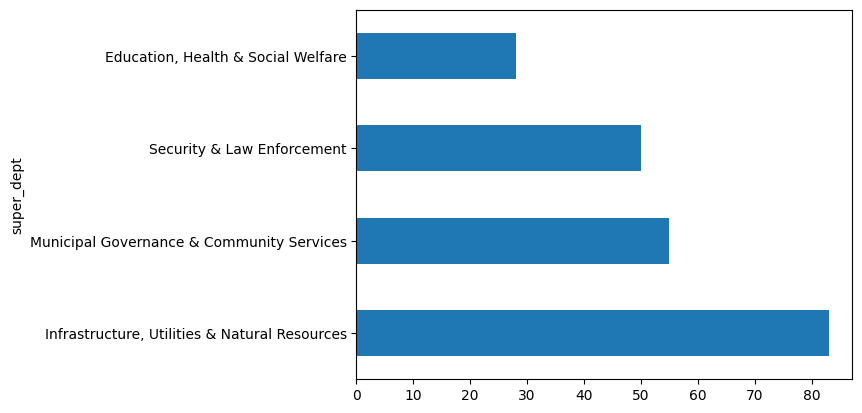

In [308]:
labelled_grievance_urgency_merged_df.super_dept.value_counts().plot(kind='barh')

In [309]:
unlabelled_grievance_urgency_merged_df['super_dept'] = (unlabelled_grievance_urgency_merged_df
                                                        ['assigned_office_name'].
                                                        map(superdepartment_map))
(list(unlabelled_grievance_urgency_merged_df[unlabelled_grievance_urgency_merged_df.super_dept.isna()]
      .assigned_office_name))

[]

<Axes: ylabel='super_dept'>

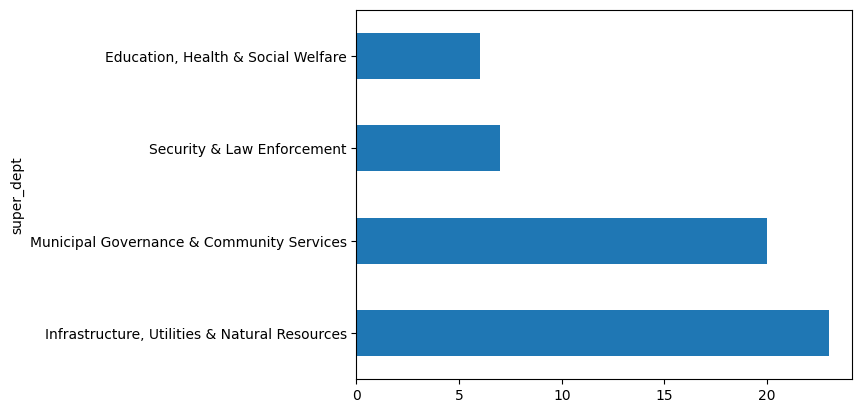

In [310]:
unlabelled_grievance_urgency_merged_df['super_dept'].value_counts().plot(kind='barh')

In [311]:
labelled_grievance_urgency_merged_df.complain_type.unique()

array(['HIGHLY URGENT', 'URGENT', 'NORMAL'], dtype=object)

In [312]:
labelled_grievance_urgency_merged_df.head()

,id,assigned_office_name,complain_type,grievance,super_dept
0,83222,"संस्कृति, पर्यटन तथा नागरिक उड्डयन मन्त्रालय",HIGHLY URGENT,Subject: Enhancing Nepal’s Tourism Policies an...,Municipal Governance & Community Services
1,74259,स्वास्थ्य तथा जनसंख्या मन्त्रालय,URGENT,स्वास्थ्य बिमा लागू नहुदा उपचारमा कठिनाई परेको,"Education, Health & Social Welfare"
2,73063,अर्थ मन्त्रालय,URGENT,युवा तथा साना व्यावसायी स्वरोजगार कोषमा रिक्त ...,Municipal Governance & Community Services
3,71078,नेपाल विद्युत प्राधिकरण,HIGHLY URGENT,उपरोक्त सम्बन्धमा हामी निवेदकहरु यस प्राधिकरण ...,"Infrastructure, Utilities & Natural Resources"
4,67993,वन तथा वातावरण मन्त्रालय,HIGHLY URGENT,वन कार्यालयका हाकिम र सहायक हाकिम हरुले गैर नै...,"Infrastructure, Utilities & Natural Resources"


In [313]:
unlabelled_grievance_urgency_merged_df.head()

,id,assigned_office_name,complain_type,grievance,super_dept
0,52790,"जिल्ला प्रशासन कार्यालय, मोरङ्ग",BLOCKER,मैले भर्खरै (०८० असोज १५: बिहान १०.३० मा) बिरा...,Security & Law Enforcement
1,52697,सडक विभाग,BLOCKER,सुनसरी जिल्ला इटहरी उप महानगर भित्र अवस्थित ध...,"Infrastructure, Utilities & Natural Resources"
2,52695,काठमाण्डौं महानगरपालिका,BLOCKER,"नया बानेश्वर भिनस हस्पिटल को दाहिना,पाथीभरा गह...",Municipal Governance & Community Services
3,52451,सुझाव सम्बन्धी,NaN,काठमाडौँ जस्ता ठूला शहरमा अनलाइन एड्रेस प्रणाल...,Municipal Governance & Community Services
4,52429,काठमाण्डौं महानगरपालिका,BLOCKER,को फौजको आंखा ४ नंबर वडामा किन पुग्दैन ? कि सब...,Municipal Governance & Community Services


In [314]:
import numpy as np

new_df_1.rename(columns={
    'Description':'grievance', 
    'Category': 'super_dept',
    'Urgency': 'complain_type'
},
inplace=True)

new_df_1['id'] = np.random.randint(100000, 999999, size=len(new_df_1))
new_df_1.head()

,grievance,super_dept,complain_type,id
0,"Violence in certain areas has escalated, with ...",Security & Law Enforcement,HIGHLY URGENT,609737
1,"Garbage is not being collected regularly, lead...","Infrastructure, Utilities & Natural Resources",URGENT,502918
2,Road accidents have increased due to lack of p...,Security & Law Enforcement,HIGHLY URGENT,262974
3,"Roads in the area are severely damaged, causin...",Security & Law Enforcement,HIGHLY URGENT,839917
4,"Issues related to the Waqf Board have emerged,...","Infrastructure, Utilities & Natural Resources",URGENT,113635


In [315]:
labelled_grievance_urgency_merged_df.drop(columns=['assigned_office_name'], inplace=True)
unlabelled_grievance_urgency_merged_df.drop(columns=['assigned_office_name'], inplace=True)



In [323]:
final_df = pd.concat([labelled_grievance_urgency_merged_df, new_df_1],  axis=0, ignore_index=True)

In [324]:
final_df.rename(columns={'complain_type':'urgency'}, inplace=True)
unlabelled_grievance_urgency_merged_df.rename(columns={'complain_type':'urgency'}, inplace=True)

final_df.info(), unlabelled_grievance_urgency_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          236 non-null    int64 
 1   urgency     236 non-null    object
 2   grievance   236 non-null    object
 3   super_dept  236 non-null    object
dtypes: int64(1), object(3)
memory usage: 7.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          56 non-null     int64 
 1   urgency     29 non-null     object
 2   grievance   56 non-null     object
 3   super_dept  56 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.9+ KB


(None, None)

In [325]:
final_df.head()

,id,urgency,grievance,super_dept
0,83222,HIGHLY URGENT,Subject: Enhancing Nepal’s Tourism Policies an...,Municipal Governance & Community Services
1,74259,URGENT,स्वास्थ्य बिमा लागू नहुदा उपचारमा कठिनाई परेको,"Education, Health & Social Welfare"
2,73063,URGENT,युवा तथा साना व्यावसायी स्वरोजगार कोषमा रिक्त ...,Municipal Governance & Community Services
3,71078,HIGHLY URGENT,उपरोक्त सम्बन्धमा हामी निवेदकहरु यस प्राधिकरण ...,"Infrastructure, Utilities & Natural Resources"
4,67993,HIGHLY URGENT,वन कार्यालयका हाकिम र सहायक हाकिम हरुले गैर नै...,"Infrastructure, Utilities & Natural Resources"


In [329]:
labelled_grievance_tweets = pd.read_csv('../data/processed/cleaned_grievance_tweets_with-urgency.csv')
labelled_grievance_tweets.rename(
    columns={'super_depart': 'super_dept'}, inplace=True
)

labelled_grievance_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404 entries, 0 to 1403
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          1404 non-null   int64 
 1   grievance   1404 non-null   object
 2   super_dept  1404 non-null   object
 3   urgency     1404 non-null   object
dtypes: int64(1), object(3)
memory usage: 44.0+ KB


In [330]:
final_df = pd.concat([final_df, labelled_grievance_tweets], axis=0, ignore_index=True)

final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640 entries, 0 to 1639
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          1640 non-null   int64 
 1   urgency     1640 non-null   object
 2   grievance   1640 non-null   object
 3   super_dept  1640 non-null   object
dtypes: int64(1), object(3)
memory usage: 51.4+ KB


In [331]:
final_df.urgency.value_counts()

urgency
URGENT           1128
NORMAL            411
HIGHLY URGENT     101
Name: count, dtype: int64

In [332]:
final_df.super_dept.value_counts()

super_dept
Security & Law Enforcement                       1341
Municipal Governance & Community Services         179
Infrastructure, Utilities & Natural Resources      90
Education, Health & Social Welfare                 30
Name: count, dtype: int64

In [335]:
final_df.rename(
    columns={'super_dept':'department'}, inplace=True
)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640 entries, 0 to 1639
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          1640 non-null   int64 
 1   urgency     1640 non-null   object
 2   grievance   1640 non-null   object
 3   department  1640 non-null   object
dtypes: int64(1), object(3)
memory usage: 51.4+ KB


In [ ]:
final_df.to_csv('../data/processed/final-grievance-data_with_urgency-dept.csv', index=False)
